# Dirichlet BDDC Example

In [1]:
# dependencies
using LFAToolkit
using LinearAlgebra
using Pkg
Pkg.activate("./")
Pkg.instantiate()
using Plots

 Activating environment at `~/Documents/dissertation/jupyter/Project.toml`


In [2]:
# setup
p = 4
mesh = Mesh2D(1.0, 1.0)

# diffusion operator
diffusion = GalleryOperator("diffusion", p + 1, p + 2, mesh)

# Dirichlet BDDC smoother
bddc = DirichletBDDC(diffusion)

Dirichlet BDDC preconditioner

max eigenvalue: 2.2420089875846876


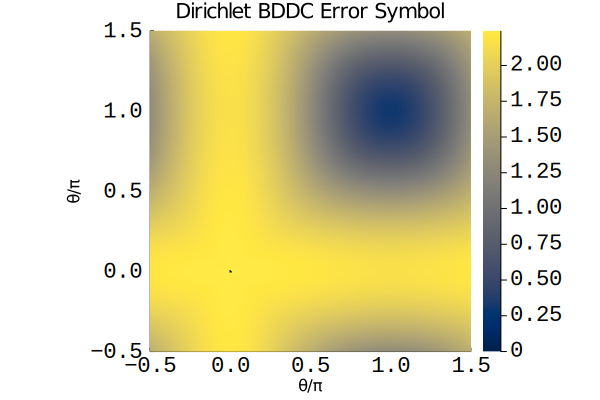

In [3]:
# full operator symbols
numbersteps = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2
θ_step = 2π/(numbersteps-1)
θ_range = θ_min:θ_step:θ_max

# compute and plot smoothing factor
# setup
ω = [1.0]
maxeigenvalues = zeros(numbersteps, numbersteps)

# compute
for i in 1:numbersteps, j in 1:numbersteps
    θ = [θ_range[i], θ_range[j]]
    if sqrt(abs(θ[1])^2 + abs(θ[2])^2) > π/128
        A = computesymbols(bddc, ω, θ)
        eigenvalues = [abs(val) for val in eigvals(A)]
        maxeigenvalues[i, j] = max(eigenvalues...)
        maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i, j])
    end
end

# plot
println("max eigenvalue: ", maxeigenvalue)
xrange = θ_range/π
heatmap(
    xrange,
    xlabel="θ/π",
    xtickfont=font(12, "Courier"),
    xrange,
    ylabel="θ/π",
    ytickfont=font(12, "Courier"),
    maxeigenvalues,
    title="Dirichlet BDDC Error Symbol",
    transpose=true,
    aspect_ratio=:equal,
    color=:cividis
)
xlims!(θ_min/π, θ_max/π)
ylims!(θ_min/π, θ_max/π)

In [4]:
savefig("DirichletBDDCHighOrderNoRelaxation")

max eigenvalue: 0.5300000000045179


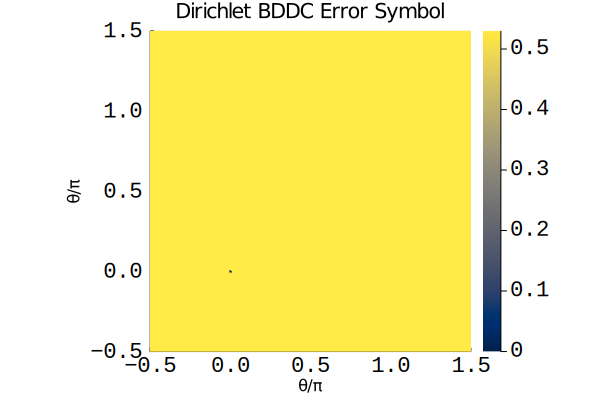

In [5]:
# full operator symbols
numbersteps = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2
θ_step = 2π/(numbersteps-1)
θ_range = θ_min:θ_step:θ_max

# compute and plot smoothing factor
# setup
ω = [0.47]
maxeigenvalues = zeros(numbersteps, numbersteps)

# compute
for i in 1:numbersteps, j in 1:numbersteps
    θ = [θ_range[i], θ_range[j]]
    if sqrt(abs(θ[1])^2 + abs(θ[2])^2) > π/128
        A = computesymbols(bddc, ω, θ)
        eigenvalues = [abs(val) for val in eigvals(A)]
        maxeigenvalues[i, j] = max(eigenvalues...)
        maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i, j])
    end
end

# plot
println("max eigenvalue: ", maxeigenvalue)
xrange = θ_range/π
heatmap(
    xrange,
    xlabel="θ/π",
    xtickfont=font(12, "Courier"),
    xrange,
    ylabel="θ/π",
    ytickfont=font(12, "Courier"),
    maxeigenvalues,
    title="Dirichlet BDDC Error Symbol",
    transpose=true,
    aspect_ratio=:equal,
    color=:cividis
)
xlims!(θ_min/π, θ_max/π)
ylims!(θ_min/π, θ_max/π)

In [6]:
savefig("DirichletBDDCHighOrder47Relaxation")